> **Importing libraries** <br>
> for Linear Regression, Gradient Boosting and Random Forest

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np

> Step 1: Loading the dataset

In [2]:
data = pd.read_csv('C:\\Users\\vyas1\\OneDrive\\Desktop\\GWU\\2nd sem\\nndl\\ML project\\Data\\new.csv')

In [3]:
data.describe()

,Departure_Delay_Minutes,Arrival_Delay_Minutes,Scheduled_Elapsed_Time_Minutes,Actual_Elapsed_Time_Minutes
count,50000.000000,50000.000000,50000.000000,50000.00000
mean,9.986680,4.088500,141.790500,135.60202
std,50.681468,52.382558,71.208865,70.33093
min,-56.000000,-75.000000,22.000000,17.00000
25%,-5.000000,-15.000000,90.000000,85.00000
50%,-2.000000,-7.000000,125.000000,120.00000
75%,6.000000,6.000000,172.000000,165.00000
max,2966.000000,2934.000000,675.000000,663.00000


> Step 2: Preprocessing the data <br>
> -> We first create a binary target variable <br>
> -> And then drop the non-feature columns

In [4]:
data['is_delayed'] = (data['Arrival_Delay_Minutes'] > 0).astype(int)  
features = data.drop(['Arrival_Delay_Minutes', 'is_delayed'], axis=1)

> We then handle the categorical variable and the missing values <br>
> -> Handling the missing values <br>
> -> Converting the categorical variables to dummy variables

In [5]:
features.fillna(method='ffill', inplace=True) 
features = pd.get_dummies(features)

> Step 3: Define the target variable

In [6]:
target = data['Arrival_Delay_Minutes']

> Step 4: Spliting data into training and testing sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

> **I. Linear Regression** <br>

> Step 5: Training the Linear Regression Model <br>
> Step 6: Predicting and classifying the output by converting actual delay time to binary classes for evaluation

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predicted_classes = [1 if i > 0 else 0 for i in predictions]

actual_classes = [1 if i > 0 else 0 for i in y_test]

> Step 7: Evaluating the model and printing the output

In [10]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
accuracy = accuracy_score(actual_classes, predicted_classes)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"Accuracy: {accuracy}")

MSE: 147.00636925924857
RMSE: 12.124618313961417
Accuracy: 0.8829


> Using this algorithm and checking feature importance on weather conditions

Mean Squared Error: 2563.331731338171


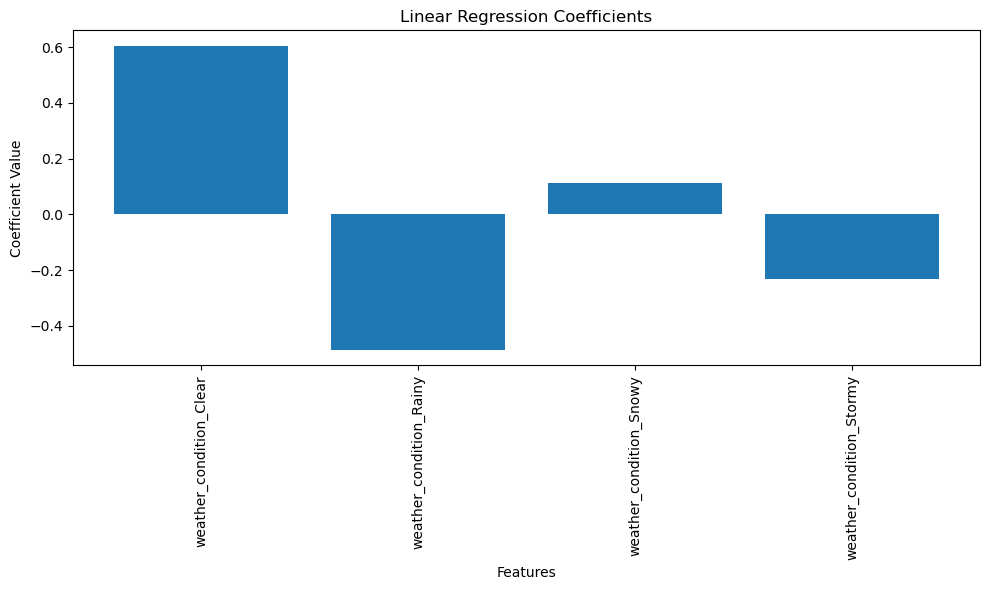

In [23]:
# Feature Engineering
data['Scheduled_Departure_Time'] = pd.to_datetime(data['Scheduled_Departure_Time'])
data['Scheduled_Arrival_Time'] = pd.to_datetime(data['Scheduled_Arrival_Time'])
data['hour_of_day'] = data['Scheduled_Departure_Time'].dt.hour  # Extract hour of day

# Adding weather data as a placeholder (this would need actual data integration)
data['weather_condition'] = np.random.choice(['Clear', 'Rainy', 'Snowy', 'Stormy'], size=len(data))

# Prepare features and target
features = data.drop(['Departure_Delay_Minutes'], axis=1)
target = data['Departure_Delay_Minutes']

# Encoding categorical variables
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(features[['weather_condition']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded_features, target, test_size=0.2, random_state=42)

# Model Training using Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting the delay minutes
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
print(f'Mean Squared Error: {lr_mse}')

# Visualize coefficients
if isinstance(encoded_features, np.ndarray):
    feature_names = ['Feature ' + str(i) for i in range(encoded_features.shape[1])]
else:
    feature_names = encoder.get_feature_names_out()

plt.figure(figsize=(10, 6))
plt.bar(feature_names, lr_model.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

> **II. Random Forest**

> Step 5: Training the Random Forest Model <br>
> Step 6: Predicting and classifying the output by converting actual delay time to binary classes for evaluation

In [11]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_predicted_classes = [1 if i > 0 else 0 for i in rf_predictions]

actual_classes = [1 if i > 0 else 0 for i in y_test]

> Step 7: Evaluating the model and printing the output

In [12]:
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_accuracy = accuracy_score(actual_classes, rf_predicted_classes)

print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")
print(f"Accuracy: {rf_accuracy}")

MSE: 38.8353749
RMSE: 6.231803502999753
Accuracy: 0.9742


> Using this algorithm and checking feature importance on weather conditions

Mean Squared Error: 2564.2447450146706


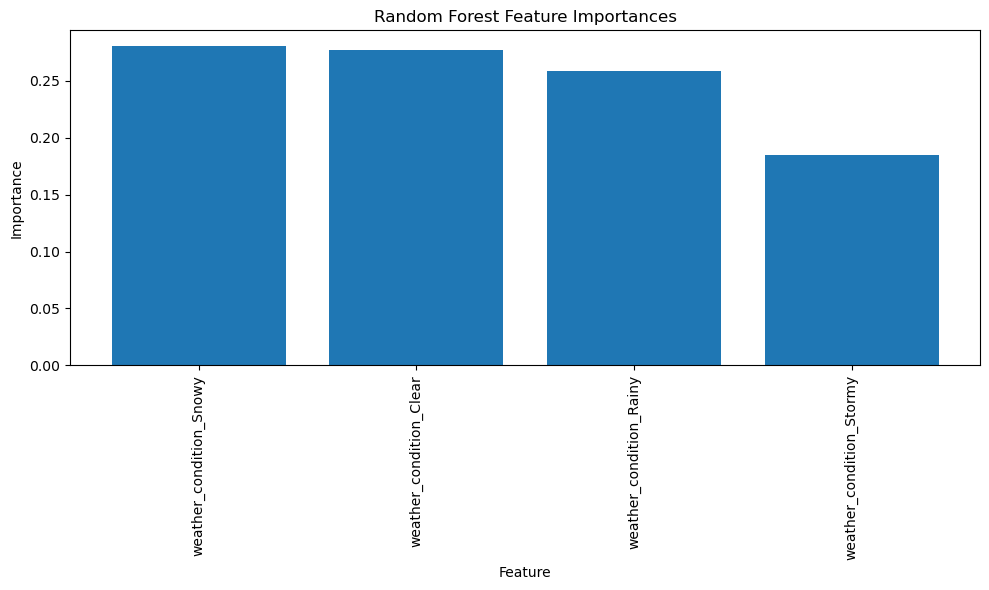

In [24]:
from sklearn.preprocessing import OneHotEncoder

# Feature Engineering
data['Scheduled_Departure_Time'] = pd.to_datetime(data['Scheduled_Departure_Time'])
data['Scheduled_Arrival_Time'] = pd.to_datetime(data['Scheduled_Arrival_Time'])
data['hour_of_day'] = data['Scheduled_Departure_Time'].dt.hour  # Extract hour of day

# Adding weather data as a placeholder
data['weather_condition'] = np.random.choice(['Clear', 'Rainy', 'Snowy', 'Stormy'], size=len(data))

# Prepare features and target
features = data.drop(['Departure_Delay_Minutes'], axis=1)
target = data['Departure_Delay_Minutes']

# Encoding categorical variables
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(features[['weather_condition']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded_features, target, test_size=0.2, random_state=42)

# Model Training using Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting the delay minutes
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Mean Squared Error: {rf_mse}')

# Visualize feature importances
feature_names = encoder.get_feature_names_out(['weather_condition'])
importances = rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Random Forest Feature Importances')
plt.bar(range(len(importances)), importances[sorted_indices], align='center')
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

> **III. Graident Boosting**

> Step 5: Training the Gradient Boosting Model <br>
> Step 6: Predicting and classifying the output by converting actual delay time to binary classes for evaluation

In [13]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

gb_predictions = gb_model.predict(X_test)

gb_predicted_classes = [1 if i > 0 else 0 for i in gb_predictions]

actual_classes = [1 if i > 0 else 0 for i in y_test]

> Step 7: Evaluating the model and printing the output

In [14]:
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_rmse = np.sqrt(gb_mse)
gb_accuracy = accuracy_score(actual_classes, gb_predicted_classes)

print(f"MSE: {gb_mse}")
print(f"RMSE: {gb_rmse}")
print(f"Accuracy: {gb_accuracy}")

MSE: 62.82806859820414
RMSE: 7.926415873407358
Accuracy: 0.9156


> Using this algorithm and checking feature importance on weather conditions

Mean Squared Error: 2563.9709448247922


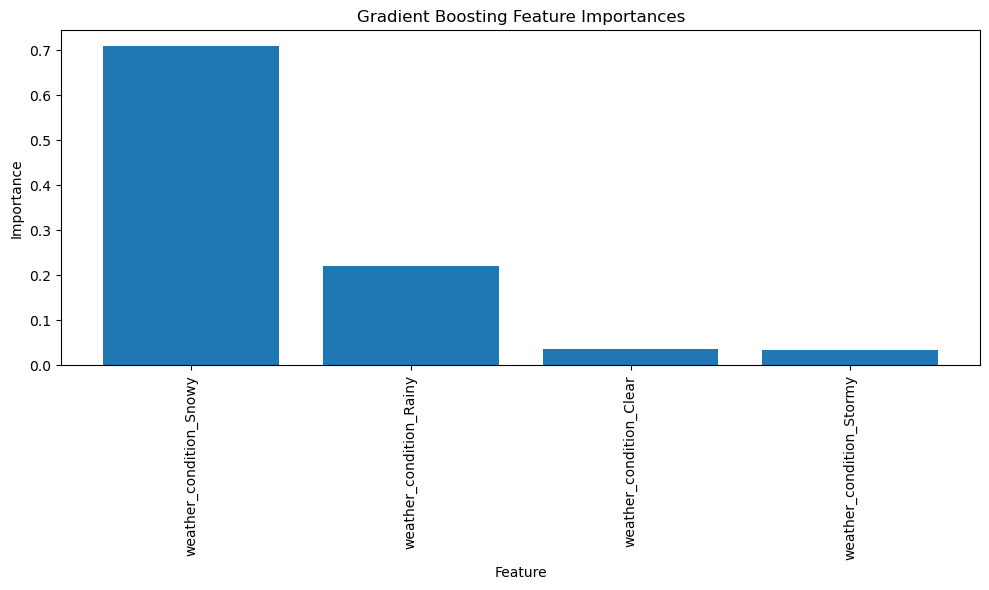

In [25]:
# Feature Engineering
data['Scheduled_Departure_Time'] = pd.to_datetime(data['Scheduled_Departure_Time'])
data['Scheduled_Arrival_Time'] = pd.to_datetime(data['Scheduled_Arrival_Time'])
data['hour_of_day'] = data['Scheduled_Departure_Time'].dt.hour  # Extract hour of day

# Adding weather data as a placeholder
data['weather_condition'] = np.random.choice(['Clear', 'Rainy', 'Snowy', 'Stormy'], size=len(data))

# Prepare features and target
features = data.drop(['Departure_Delay_Minutes'], axis=1)
target = data['Departure_Delay_Minutes']

# Encoding categorical variables
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(features[['weather_condition']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded_features, target, test_size=0.2, random_state=42)

# Model Training using Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predicting the delay minutes
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
print(f'Mean Squared Error: {gb_mse}')

# Visualize feature importances
feature_names = encoder.get_feature_names_out(['weather_condition'])
importances = gb_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Gradient Boosting Feature Importances')
plt.bar(range(len(importances)), importances[sorted_indices], align='center')
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()